In [2]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from mammo_utils import remove_white_from_image, slice_normal_image, create_slices,random_flip_image
%matplotlib inline

In [5]:
# the DBA scanned images seem to not be as good quality as images from the other scanners. I am using tighter
# thresholds here to try to keep the images of decent quality with usable content, no text and as little static as possible
path = "E:\\Documents\\Mammography\\DDSM\\PNGs\\DBA pngs"

#dba_slices, dba_labels = create_slices(path, var_upper_threshhold=1000, var_lower_threshhold=50, mean_threshold=70)
dba_slices, dba_labels = create_slices(path, var_upper_threshhold=1500, var_lower_threshhold=20, mean_threshold=38, stride=200)

0 - A_0014_1.LEFT_CC.LJPEG.png
1 - A_0014_1.LEFT_MLO.LJPEG.png
2 - A_0014_1.RIGHT_CC.LJPEG.png
3 - A_0014_1.RIGHT_MLO.LJPEG.png
4 - A_0015_1.LEFT_CC.LJPEG.png
5 - A_0015_1.LEFT_MLO.LJPEG.png
6 - A_0015_1.RIGHT_CC.LJPEG.png
7 - A_0015_1.RIGHT_MLO.LJPEG.png
8 - A_0016_1.LEFT_CC.LJPEG.png
9 - A_0016_1.LEFT_MLO.LJPEG.png
10 - A_0016_1.RIGHT_CC.LJPEG.png
11 - A_0016_1.RIGHT_MLO.LJPEG.png
12 - A_0018_1.LEFT_CC.LJPEG.png
13 - A_0018_1.LEFT_MLO.LJPEG.png
14 - A_0018_1.RIGHT_CC.LJPEG.png
15 - A_0018_1.RIGHT_MLO.LJPEG.png
16 - A_0020_1.LEFT_CC.LJPEG.png
17 - A_0020_1.LEFT_MLO.LJPEG.png
18 - A_0020_1.RIGHT_CC.LJPEG.png
19 - A_0020_1.RIGHT_MLO.LJPEG.png
20 - A_0022_1.LEFT_CC.LJPEG.png
21 - A_0022_1.LEFT_MLO.LJPEG.png
22 - A_0022_1.RIGHT_CC.LJPEG.png
23 - A_0022_1.RIGHT_MLO.LJPEG.png
24 - A_0024_1.LEFT_CC.LJPEG.png
25 - A_0024_1.LEFT_MLO.LJPEG.png
26 - A_0024_1.RIGHT_CC.LJPEG.png
27 - A_0024_1.RIGHT_MLO.LJPEG.png
28 - A_0026_1.LEFT_CC.LJPEG.png
29 - A_0026_1.LEFT_MLO.LJPEG.png
30 - A_0026_1.RIGHT_C

In [6]:
print("DBA Slices:", len(dba_slices))
print("DBA Labels:", len(dba_labels))

DBA Slices: 31902
DBA Labels: 31902


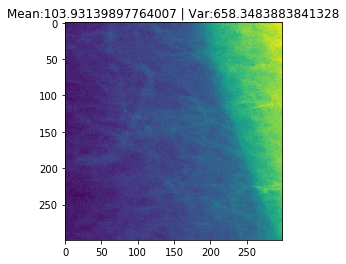

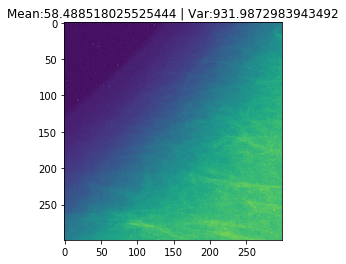

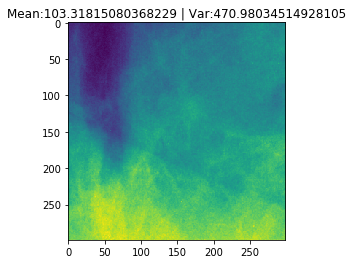

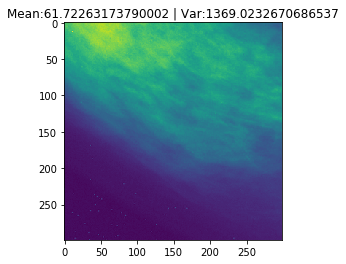

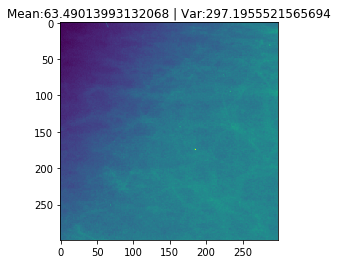

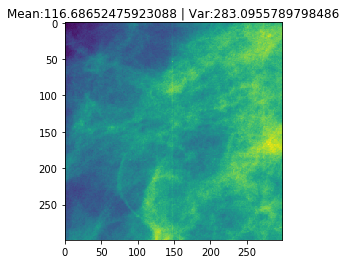

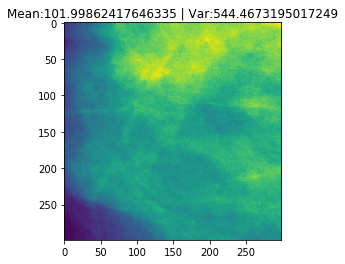

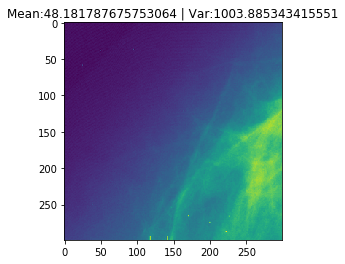

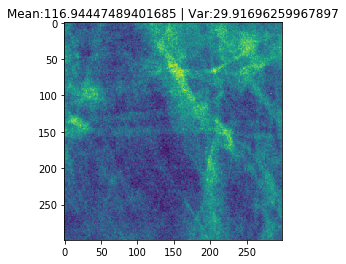

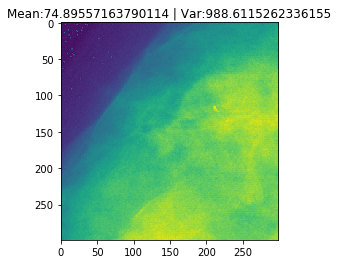

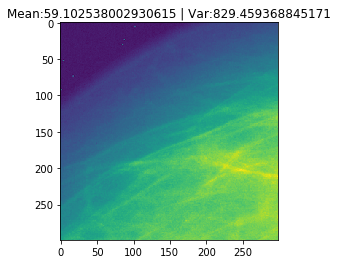

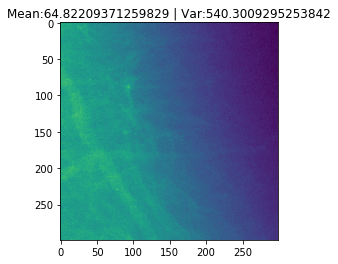

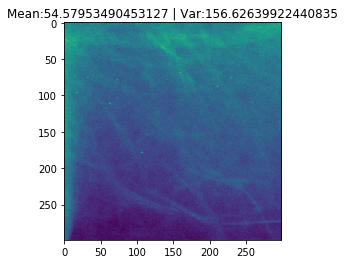

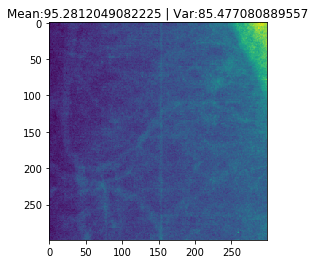

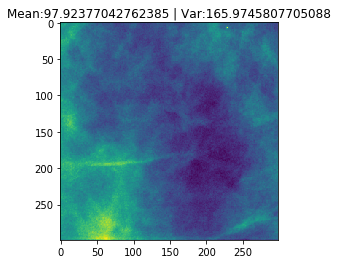

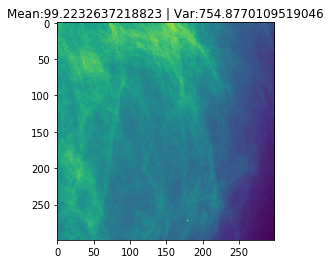

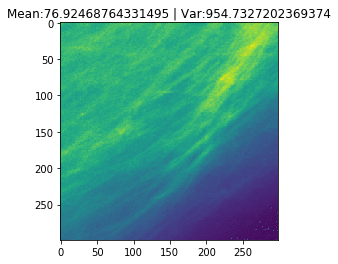

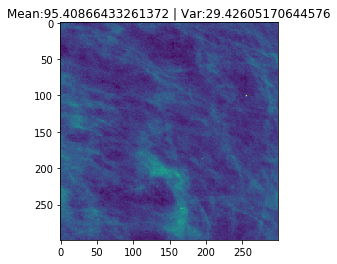

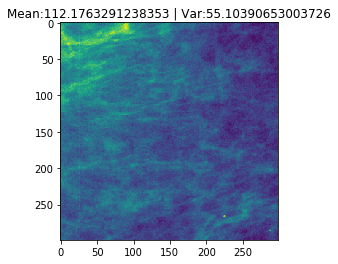

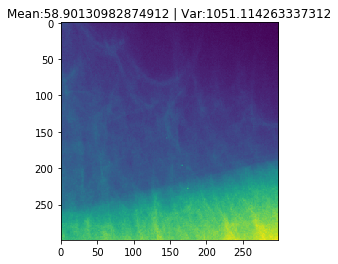

In [7]:
# look at some slices to make sure everything looks good
N = 20
idxs = random.sample(range(len(dba_slices)), k=N)

for i in idxs:
    plt.imshow(dba_slices[i].reshape(299,299))
    plt.title("Mean:" + str(np.mean(dba_slices[i])) + " | Var:" + str(np.var(dba_slices[i])))
    plt.show()

In [8]:
np.save(os.path.join("data", "dba_slices.npy"), dba_slices)
np.save(os.path.join("data", "dba_labels.npy"), dba_labels)

## Lumisys Slices

In [3]:
path = "E:\\Documents\\Mammography\\DDSM\\PNGs\\Lumisys pngs"
path = "C:\\Users\\eric\\Documents\\Courses\\Applied ML 2\\mammography\\data\\ddsm\\Lumisys pngs"

#lumisys_slices, lumisys_labels = create_slices(path, var_upper_threshhold=1000, var_lower_threshhold=30, mean_threshold=60)
lumisys_slices, lumisys_labels = create_slices(path, var_upper_threshhold=10000, var_lower_threshhold=10, mean_threshold=28, stride=150)

0 - B_3600_1.LEFT_CC.LJPEG.png
1 - B_3600_1.LEFT_MLO.LJPEG.png
2 - B_3600_1.RIGHT_CC.LJPEG.png
3 - B_3600_1.RIGHT_MLO.LJPEG.png
4 - B_3601_1.LEFT_CC.LJPEG.png
5 - B_3601_1.LEFT_MLO.LJPEG.png
6 - B_3601_1.RIGHT_CC.LJPEG.png
7 - B_3601_1.RIGHT_MLO.LJPEG.png
8 - B_3602_1.LEFT_CC.LJPEG.png
9 - B_3602_1.LEFT_MLO.LJPEG.png
10 - B_3602_1.RIGHT_CC.LJPEG.png
11 - B_3602_1.RIGHT_MLO.LJPEG.png
12 - B_3603_1.LEFT_CC.LJPEG.png
13 - B_3603_1.LEFT_MLO.LJPEG.png
14 - B_3603_1.RIGHT_CC.LJPEG.png
15 - B_3603_1.RIGHT_MLO.LJPEG.png
16 - B_3604_1.LEFT_CC.LJPEG.png
17 - B_3604_1.LEFT_MLO.LJPEG.png
18 - B_3604_1.RIGHT_CC.LJPEG.png
19 - B_3604_1.RIGHT_MLO.LJPEG.png
20 - B_3605_1.LEFT_CC.LJPEG.png
21 - B_3605_1.LEFT_MLO.LJPEG.png
22 - B_3605_1.RIGHT_CC.LJPEG.png
23 - B_3605_1.RIGHT_MLO.LJPEG.png
24 - B_3606_1.LEFT_CC.LJPEG.png
25 - B_3606_1.LEFT_MLO.LJPEG.png
26 - B_3606_1.RIGHT_CC.LJPEG.png
27 - B_3606_1.RIGHT_MLO.LJPEG.png
28 - B_3607_1.LEFT_CC.LJPEG.png
29 - B_3607_1.LEFT_MLO.LJPEG.png
30 - B_3607_1.RIGHT_C

In [4]:
print("Lumisys Slices:", len(lumisys_slices))
print("Lumisys Labels:", len(lumisys_labels))

Lumisys Slices: 10687
Lumisys Labels: 10687


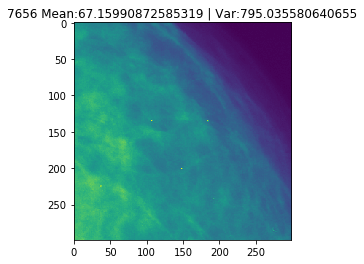

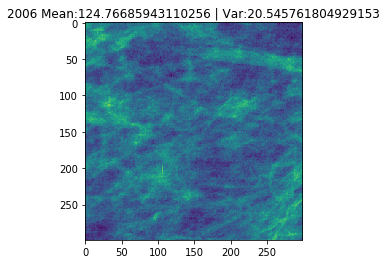

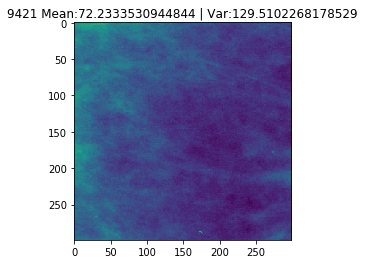

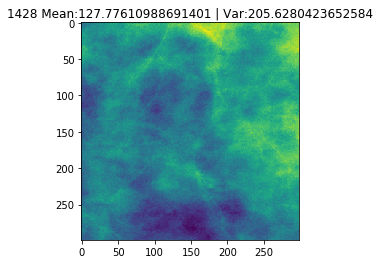

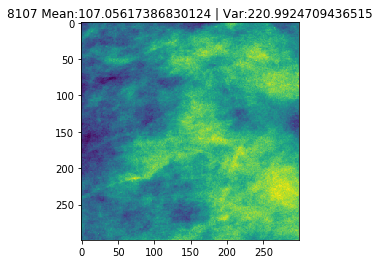

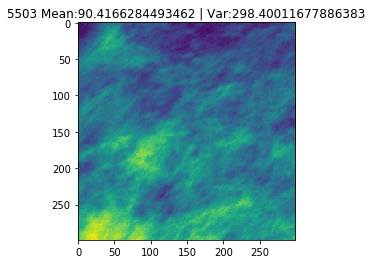

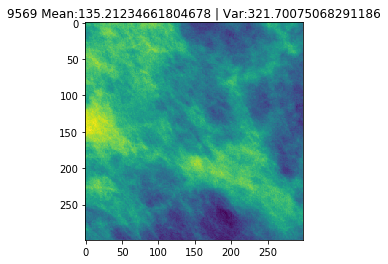

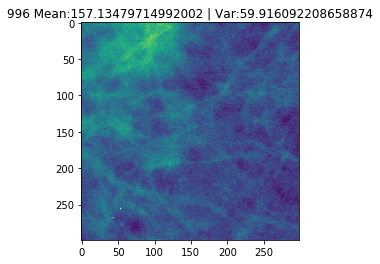

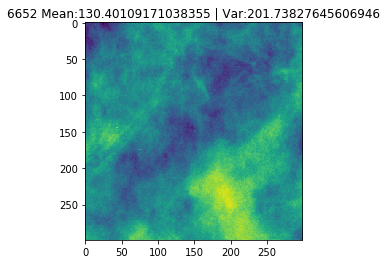

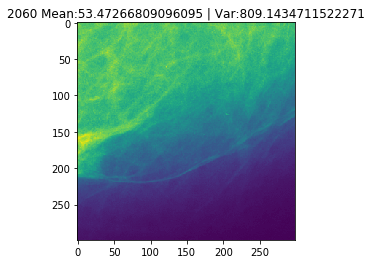

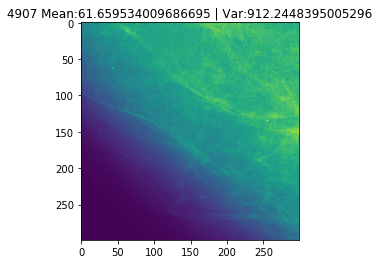

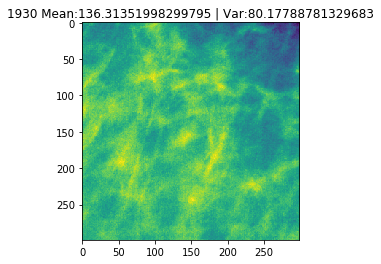

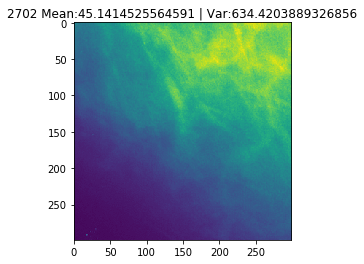

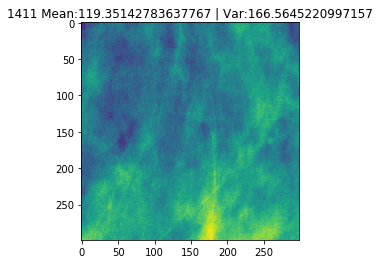

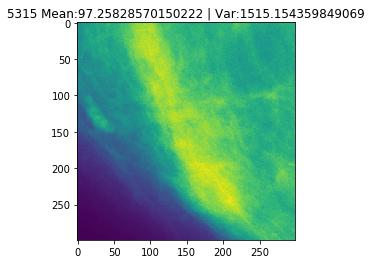

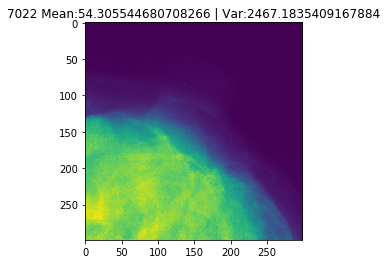

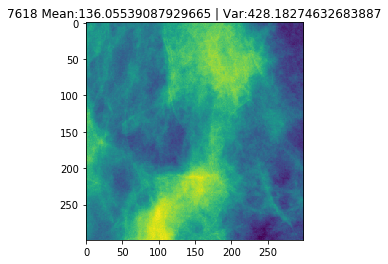

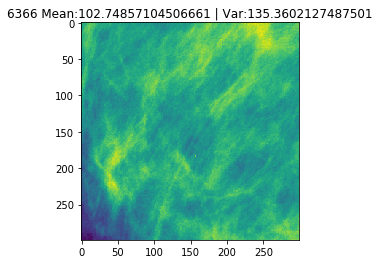

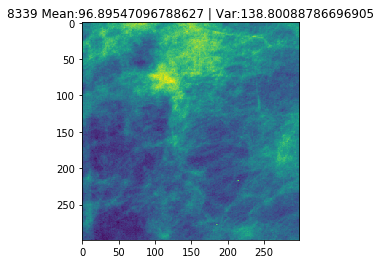

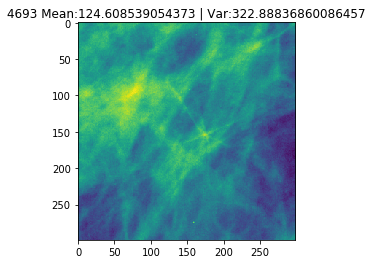

In [5]:
# look at some slices to make sure everything looks good
N = 20
idxs = random.sample(range(len(lumisys_slices)), k=N)

for i in idxs:
    plt.imshow(lumisys_slices[i].reshape(299,299))
    plt.title(str(i) + " Mean:" + str(np.mean(lumisys_slices[i])) + " | Var:" + str(np.var(lumisys_slices[i])))
    plt.show()

In [6]:
np.save(os.path.join("data", "lumisys_slices.npy"), lumisys_slices)
np.save(os.path.join("data", "lumisys_labels.npy"), lumisys_labels)

## Howtek

In [7]:
path = "E:\\Documents\\Mammography\\DDSM\\PNGs\\Howtek pngs"

# use a copy on the local drive to try to speed this up a bit
path = "C:\\Users\\eric\\Documents\\Courses\\Applied ML 2\\mammography\\data\\ddsm\\Howtek pngs"

# create the slices
howtek_slices, howtek_labels = create_slices(path, var_upper_threshhold=10000, var_lower_threshhold=10, mean_threshold=30, stride=150)

0 - A_1955_1.LEFT_CC.LJPEG.png
1 - A_1955_1.LEFT_MLO.LJPEG.png
2 - A_1955_1.RIGHT_CC.LJPEG.png
3 - A_1955_1.RIGHT_MLO.LJPEG.png
4 - A_1956_1.LEFT_CC.LJPEG.png
5 - A_1956_1.LEFT_MLO.LJPEG.png
6 - A_1956_1.RIGHT_CC.LJPEG.png
7 - A_1956_1.RIGHT_MLO.LJPEG.png
8 - A_1957_1.LEFT_CC.LJPEG.png
9 - A_1957_1.LEFT_MLO.LJPEG.png
10 - A_1957_1.RIGHT_CC.LJPEG.png
11 - A_1957_1.RIGHT_MLO.LJPEG.png
12 - A_1958_1.LEFT_CC.LJPEG.png
13 - A_1958_1.LEFT_MLO.LJPEG.png
14 - A_1958_1.RIGHT_CC.LJPEG.png
15 - A_1958_1.RIGHT_MLO.LJPEG.png
16 - A_1959_1.LEFT_CC.LJPEG.png
17 - A_1959_1.LEFT_MLO.LJPEG.png
18 - A_1959_1.RIGHT_CC.LJPEG.png
19 - A_1959_1.RIGHT_MLO.LJPEG.png
20 - A_1960_1.LEFT_CC.LJPEG.png
21 - A_1960_1.LEFT_MLO.LJPEG.png
22 - A_1960_1.RIGHT_CC.LJPEG.png
23 - A_1960_1.RIGHT_MLO.LJPEG.png
24 - A_1961_1.LEFT_CC.LJPEG.png
25 - A_1961_1.LEFT_MLO.LJPEG.png
26 - A_1961_1.RIGHT_CC.LJPEG.png
27 - A_1961_1.RIGHT_MLO.LJPEG.png
28 - A_1962_1.LEFT_CC.LJPEG.png
29 - A_1962_1.LEFT_MLO.LJPEG.png
30 - A_1962_1.RIGHT_C

In [8]:
print("Howtek Slices:", len(howtek_slices))
print("Howtek Labels:", len(howtek_labels))

Howtek Slices: 23238
Howtek Labels: 23238


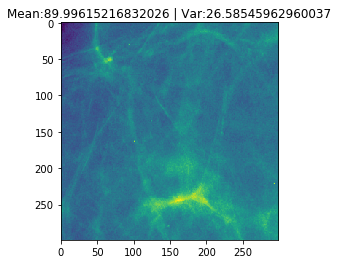

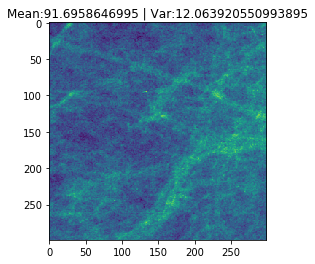

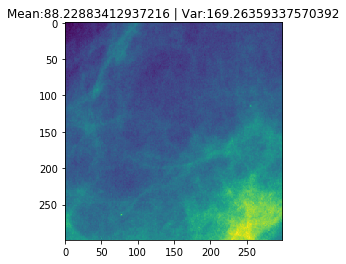

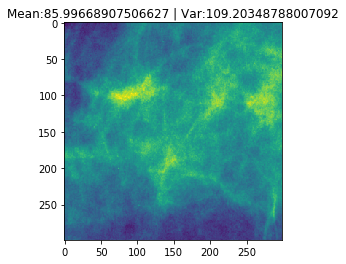

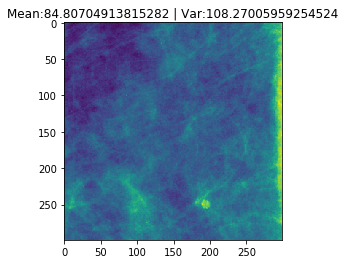

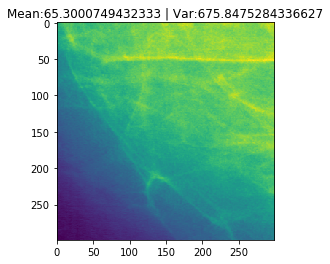

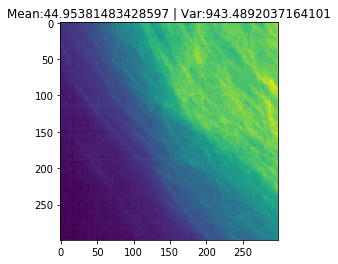

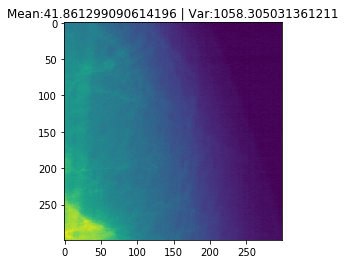

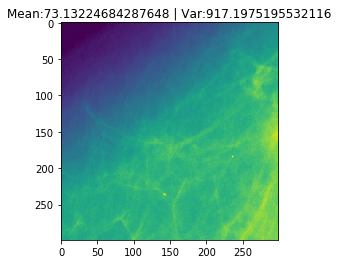

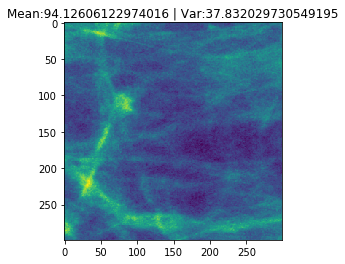

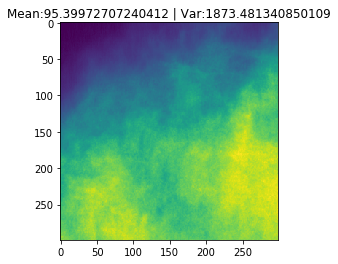

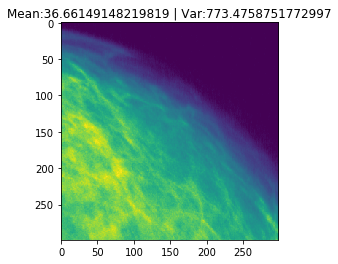

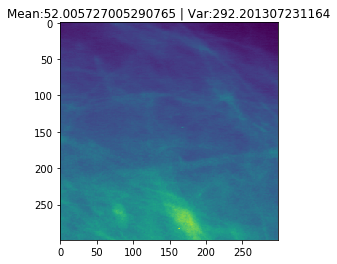

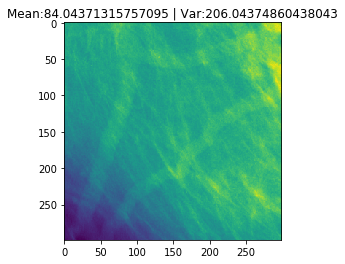

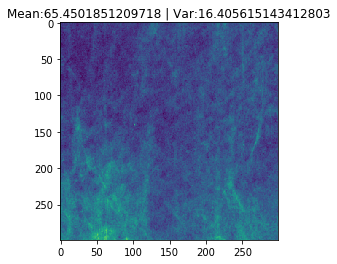

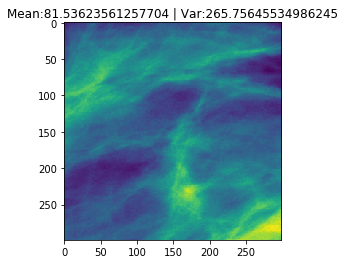

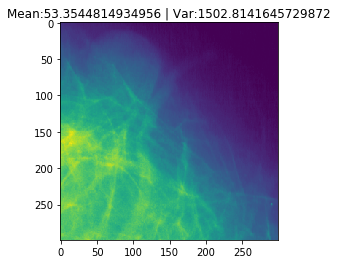

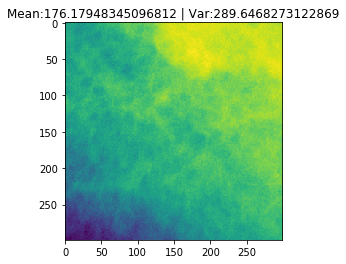

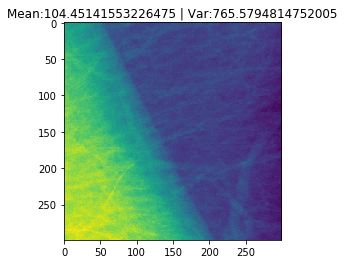

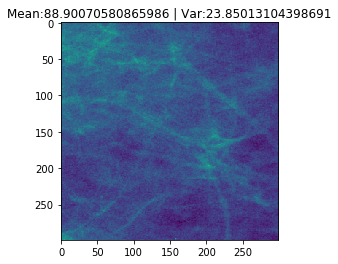

In [9]:
# look at some slices to make sure everything looks good
N = 20
idxs = random.sample(range(len(howtek_slices)), k=N)

for i in idxs:
    plt.imshow(howtek_slices[i].reshape(299,299))
    plt.title("Mean:" + str(np.mean(howtek_slices[i])) + " | Var:" + str(np.var(howtek_slices[i])))
    plt.show()

In [10]:
np.save(os.path.join("data", "howtek_slices.npy"), howtek_slices)
np.save(os.path.join("data", "howtek_labels.npy"), howtek_labels)

## Combine All Slices

I thought this was a good idea at one point, but there is no reason to do it so I am omitting this step and just directly loading the slices per scanner and combining them in write_to_tfrecords.ipynb

In [9]:
lumisys_slices = np.load("data/lumisys_slices.npy")
howtek_slices = np.load("data/howtek_slices.npy")
dba_slices = np.load("data/dba_slices.npy")

lumisys_labels = np.load("data/lumisys_labels.npy")
howtek_labels = np.load("data/howtek_labels.npy")
dba_labels = np.load("data/dba_labels.npy")

normal_slices = np.concatenate([dba_slices, howtek_slices, lumisys_slices], axis=0)
normal_labels = np.concatenate([dba_labels, howtek_labels, lumisys_labels], axis=0)

print("Normal slices:", normal_slices.shape)
print("Normal labels:", normal_labels.shape)

Normal slices: (56484, 299, 299, 1)
Normal labels: (56484,)


In [10]:
# shuffle them
from sklearn.utils import shuffle
import math

normal_slices = shuffle(normal_slices, random_state=10)

batch_size = math.ceil(normal_slices.shape[0] / 5)
print("Batch size:", batch_size)

# divide it into five batches and save them
for i in range(5):
    start_row = i*batch_size
    end_row = start_row + batch_size
    image_batch = normal_slices[start_row:end_row,:,:,:]
    label_batch = normal_labels[start_row:end_row]
    
    assert(image_batch.shape[0] == label_batch.shape[0])
    
    # save the batchs
    np.save(os.path.join("data", "image_batch_" + str(i) + ".npy"), image_batch)
    np.save(os.path.join("data", "label_batch_" + str(i) + ".npy"), label_batch)

Batch size: 11297
